In [ ]:
import cv2
from PIL import Image
from numpy import *
from pylab import *
import pandas
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import os # lib para acesso ao sistema operacional -> ler a pasta

from google.colab.patches import cv2_imshow

##Transferindo coloração de uma imagem para outra

Neste notebook será demonstrado a transferência de cor entre duas imagens utilizando o espaço de cores L * a * b *, a média e o desvio padrão de cada canal L *, a * e b *, respectivamente.

O algoritmo funciona assim:

1.   Insira uma imagem de origem e de destino. A imagem de origem contém as cores que você deseja que a imagem de destino absorva.
2.   Converta a imagem de origem e de destino no espaço de cores L * a * b *. O espaço de cores L * a * b * modela a uniformidade perceptiva, onde uma pequena mudança em uma quantidade de valor de cor também deve produzir uma mudança relativamente igual na importância da cor. O espaço de cores L * a * b * faz um trabalho substancialmente melhor em imitar como os humanos interpretam as cores do que o espaço de cores RGB padrão e, como você verá, funciona muito bem para transferência de cores.
3. Divida os canais de origem e destino.

4. Calcule a média e o desvio padrão de cada um dos canais L * a * b * para as imagens de origem e destino.
5. Subtraia a média dos canais L * a * b * da imagem alvo dos canais alvo.
6. Dimensione os canais de destino pela proporção do desvio padrão do destino dividido pelo desvio padrão da origem, multiplicado pelos canais de destino.
7. Adicione as médias dos canais L * a * b * para a origem.
8. Limite quaisquer valores que estejam fora do intervalo [0, 255]. 
9. Mescle os canais novamente.
10. Converta de volta para o espaço de cores RGB a partir do espaço L * a * b *.



In [ ]:
def transferir_cor(origem, destino):
	# converte as imagens do RGB para o espaço de cor L * ab *.
  # certifique-se de utilizar o tipo de dados de ponto flutuante (nota: OpenCV
  # espera que os dados sejam de 32 bits, então use isso em vez de 64 bits)
	origem = cv2.cvtColor(origem, cv2.COLOR_BGR2LAB).astype("float32")
	destino = cv2.cvtColor(destino, cv2.COLOR_BGR2LAB).astype("float32")
 # computar estatísticas de cores para as imagens de origem e destino
	(lMeanSrc, lStdSrc, aMeanSrc, aStdSrc, bMeanSrc, bStdSrc) = image_stats(origem)
	(lMeanTar, lStdTar, aMeanTar, aStdTar, bMeanTar, bStdTar) = image_stats(destino)
	# subtraindo a média da imagem de destino
	(l, a, b) = cv2.split(destino)
	l -= lMeanTar
	a -= aMeanTar
	b -= bMeanTar
	# escalando pelo desvio padrão
	l = (lStdTar / lStdSrc) * l
	a = (aStdTar / aStdSrc) * a
	b = (bStdTar / bStdSrc) * b
	# adicionando a média da imagem de origem
	l += lMeanSrc
	a += aMeanSrc
	b += bMeanSrc
	# limita as intensidades de pixel para [0, 255] se caso fiquem fora desse intervalo
	l = np.clip(l, 0, 255)
	a = np.clip(a, 0, 255)
	b = np.clip(b, 0, 255)
	# mescla os canais e converte de volta para o espaço de cor RGB, 
  # certificando-se de utilizar os dados inteiros
	imagem_transferida = cv2.merge([l, a, b])
	imagem_transferida = cv2.cvtColor(imagem_transferida.astype("uint8"), cv2.COLOR_LAB2BGR)
	
	# retorna a imagem com a cor transferida
	return imagem_transferida

def image_stats(image):
	# calcula a média e o desvio padrão de cada canal
	(l, a, b) = cv2.split(image)
	(lMean, lStd) = (l.mean(), l.std())
	(aMean, aStd) = (a.mean(), a.std())
	(bMean, bStd) = (b.mean(), b.std())
	# retorna as estatísticas calculadas
	return (lMean, lStd, aMean, aStd, bMean, bStd)

Text(0.5, 1.0, 'Transformada')

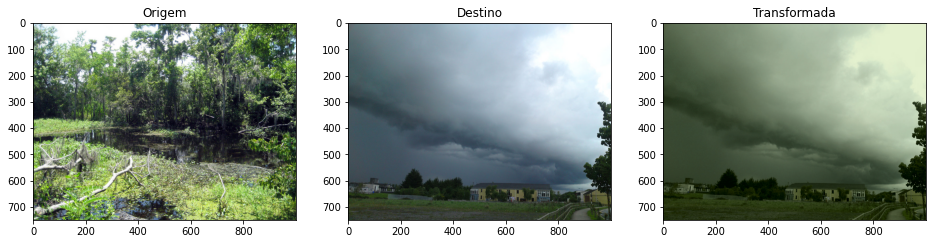

In [ ]:
# Carrega as imagens
origem = cv2.imread('woods.jpg')
destino = cv2.imread('storm.jpg')

# transfere a distribuição de cores da imagem de origem para a imagem de destino
imagem_transferida = transferir_cor(origem, destino)

origem = cv2.cvtColor(origem, cv2.COLOR_BGR2RGB)
destino = cv2.cvtColor(destino, cv2.COLOR_BGR2RGB)
imagem_transferida = cv2.cvtColor(imagem_transferida, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(16, 16))

sub_imagem = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(origem)
sub_imagem.set_title('Origem')

sub_imagem = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(destino)
sub_imagem.set_title('Destino')

sub_imagem = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(imagem_transferida)
sub_imagem.set_title('Transformada')

##Identificando a maturidade dos mamões por meio de Visão Computacional

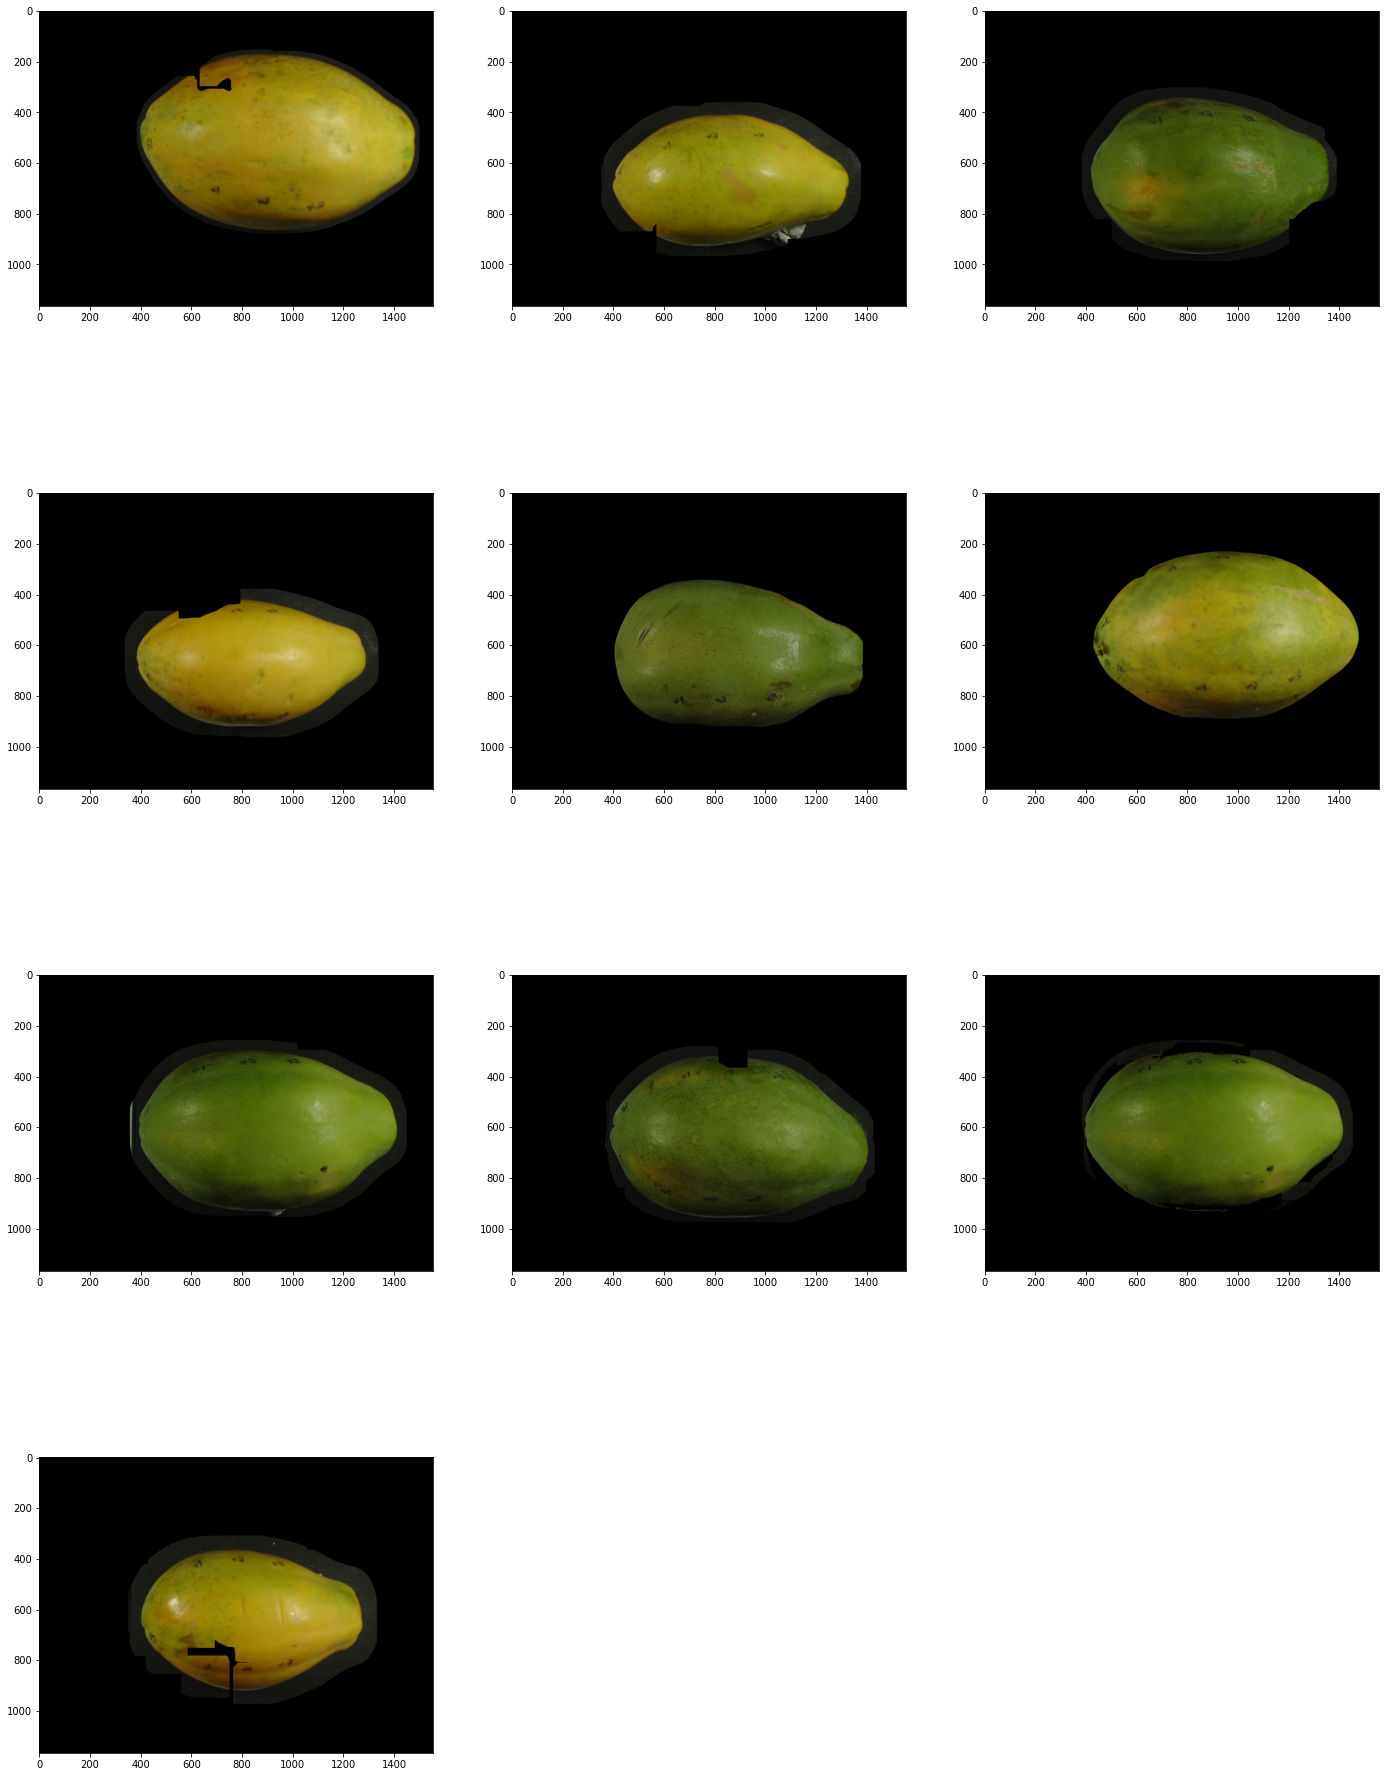

In [ ]:
# Carregando arquivos
input_folder = '/content/mamao'
files = [os.path.join(input_folder, f) for f in os.listdir(input_folder)]

fig = plt.figure(figsize=(24, 34))
atual = 1
for index,arquivo in enumerate(files):
    #nome_arquivo_completo = os.path.basename(arquivo)
    if(cv2.imread(arquivo) is not None):
        imagem =  mpimg.imread(arquivo)
        sub_imagem = fig.add_subplot(4,3, atual)
        atual = atual + 1
        imgplot = plt.imshow(imagem)
        
        
        

##Distinção de maturidade por meio da análise de histogramas

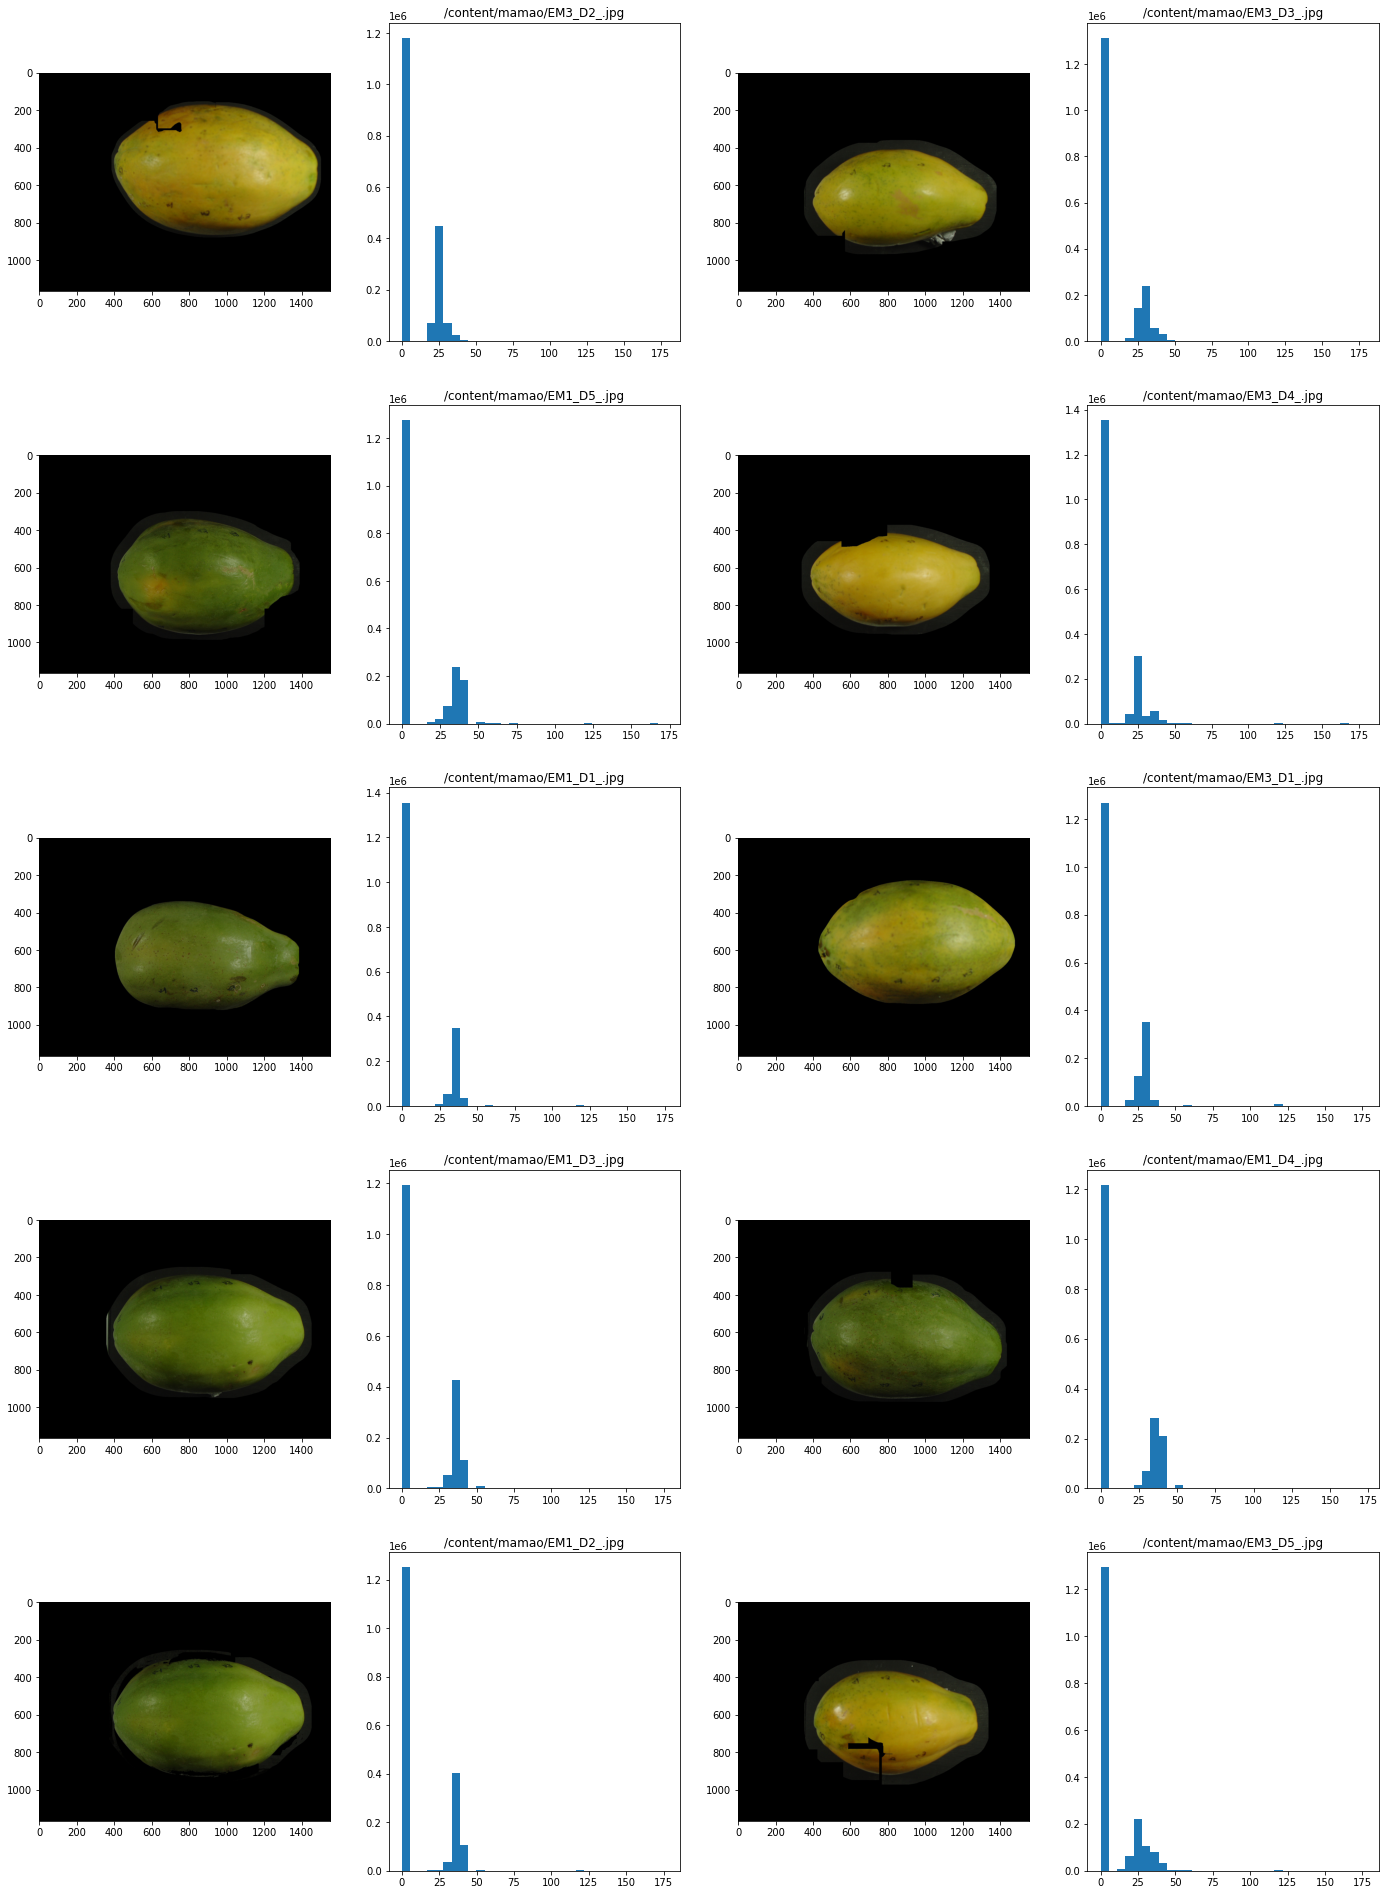

In [ ]:
fig = plt.figure(figsize=(24, 34))
atual = 1
for index,arquivo in enumerate(files):
    nome_arquivo_completo = os.path.basename(arquivo)
    if(cv2.imread(arquivo) is not None):
        imagem =  mpimg.imread(arquivo)
        sub_imagem = fig.add_subplot(5, 4, atual)
        atual = atual + 1
        imgplot = plt.imshow(imagem)

        sub_imagem = fig.add_subplot(5, 4, atual)
        atual = atual + 1
        sub_imagem.set_title(arquivo)
        
        img_hsv = cv2.cvtColor(imagem, cv2.COLOR_RGB2HSV)
        img_hist_1 = hist(img_hsv[:,:,0].flatten(), 32) #=> Canal 0: R(red), 1:B, 2: G ||||| 0: H, 1:S, 2:V
        

##Classificando os mamões de acordo com sua maturidade

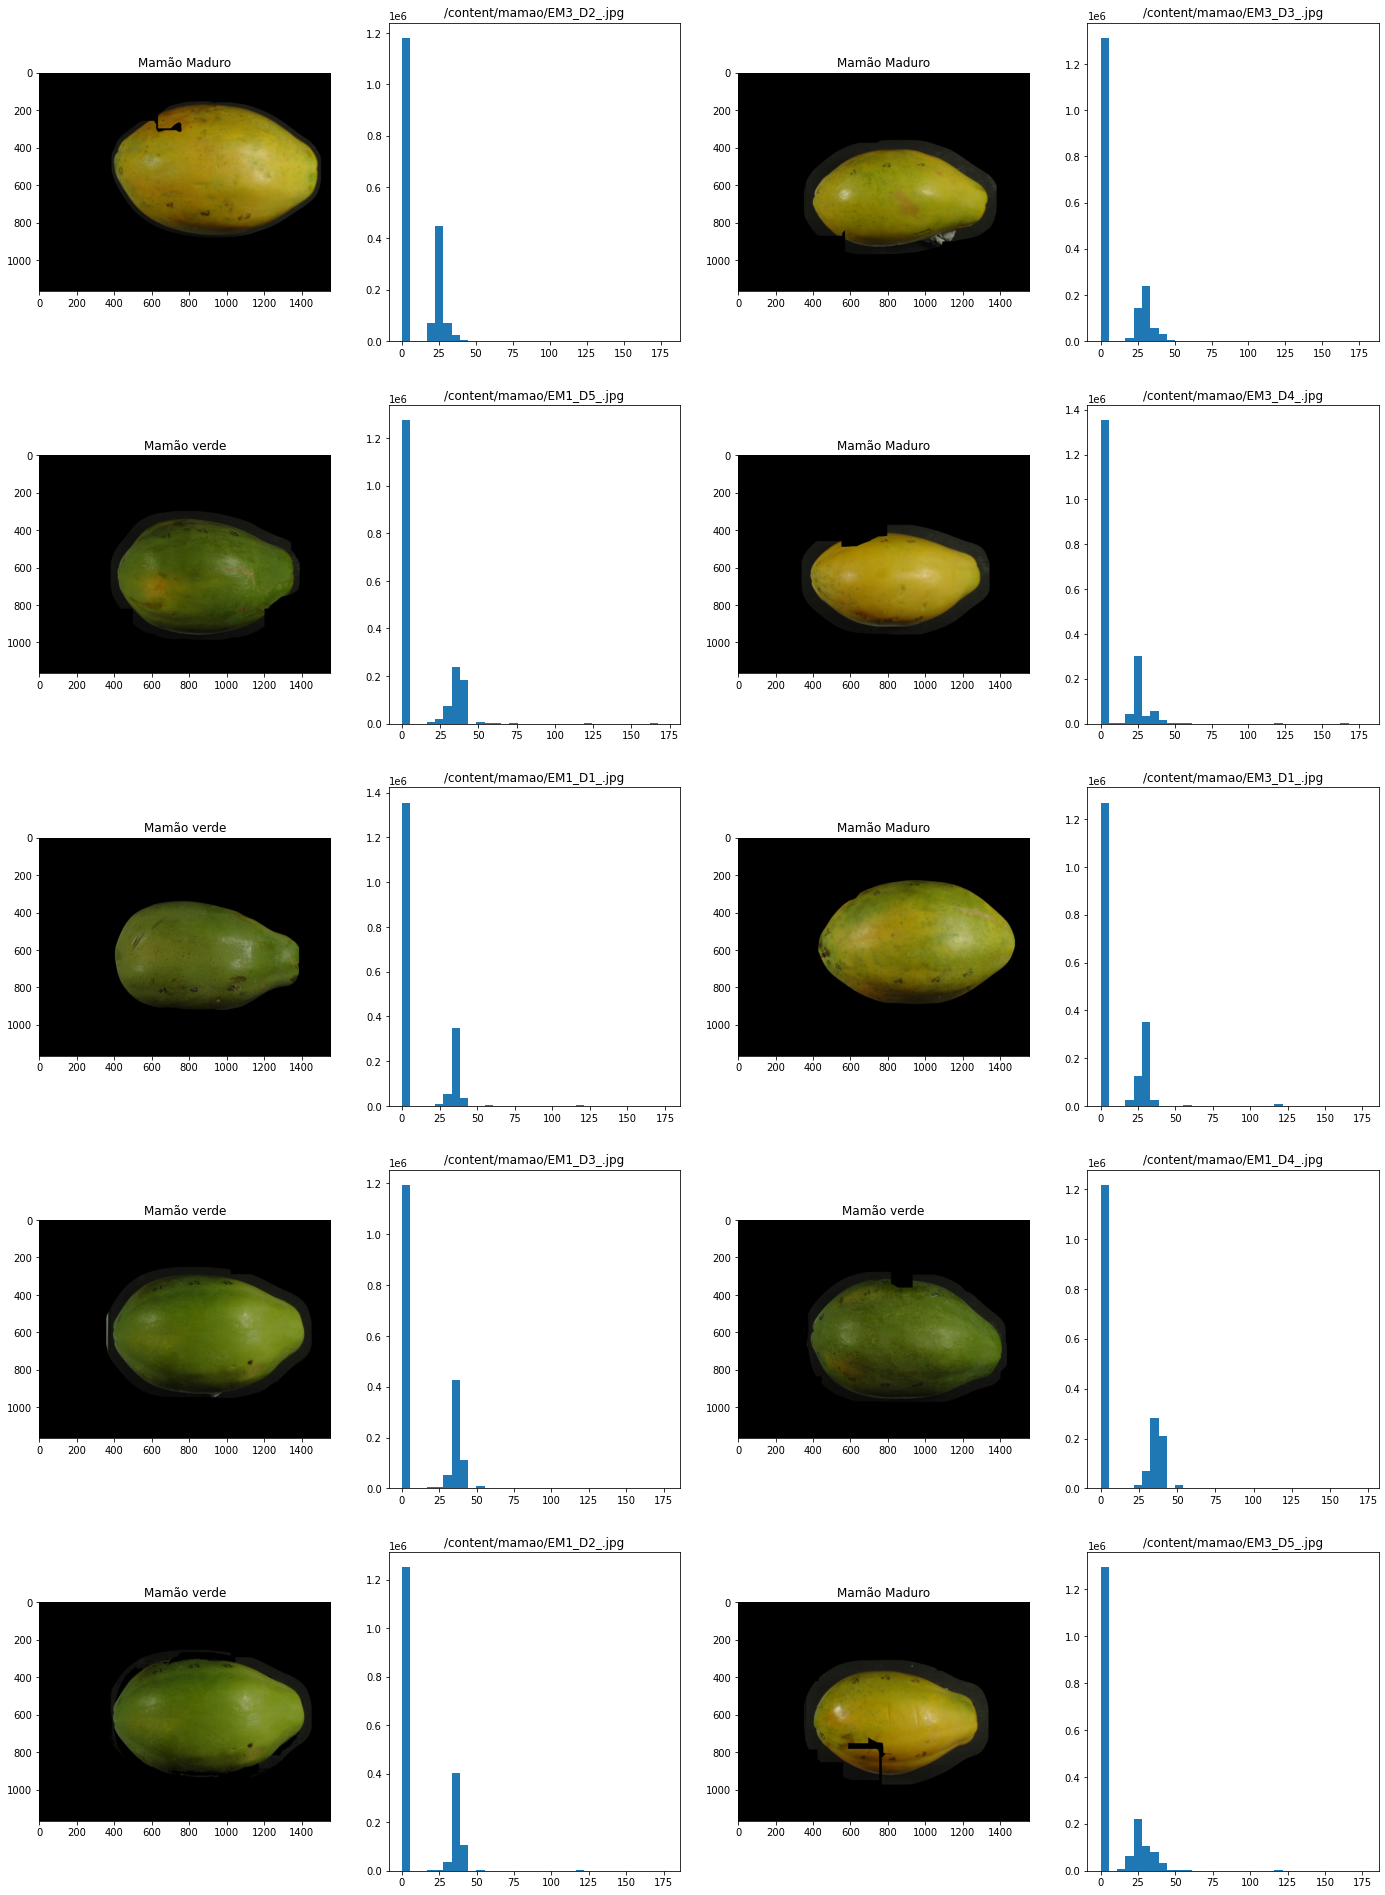

In [ ]:
fig = plt.figure(figsize=(24, 34))
atual = 1
for index,arquivo in enumerate(files):
    nome_arquivo_completo = os.path.basename(arquivo)
    if(cv2.imread(arquivo) is not None):
        imagem =  mpimg.imread(arquivo)
        sub_imagem_1 = fig.add_subplot(5, 4, atual)
        atual = atual + 1
        imgplot = plt.imshow(imagem)
        
        
        sub_imagem_2 = fig.add_subplot(5, 4, atual)
        atual = atual + 1
        sub_imagem_2.set_title(arquivo)
        
        img_hsv = cv2.cvtColor(imagem, cv2.COLOR_RGB2HSV)
        img_hist_1 = hist(img_hsv[:,:,0].flatten(), 32)
        
        
        #print(img_hist_1[0][6])
        #print(img_hist_1[0][4])
        #print(img_hist_1[0][0]) -> Plano de fundo

        #Classificador
        if img_hist_1[0][6]<img_hist_1[0][4]:
            sub_imagem_1.set_title("Mamão Maduro")
        else:
            sub_imagem_1.set_title("Mamão verde")